# Problem Set 1: Descriptive Analytics

* Authors: `Jangwon Park, Sascha Frey`
* Emails: `jangwon.park@epfl.ch, sascha.frey@epfl.ch`

# Problem Description

* A telecom company is interested in segmenting loyal customers in order to optimize customer retention effort.
* Our goal is to describe the data in preparation for this task.
* It is our assumption to claim that the following are important factors in deciding whether a customer is valuable:
    * His/her tenure (the longer, the better)
    * His/her monthly charges (the higher, the better)
* Note: the type of services that customers subscribe to is less important since they are reflected in monthly charges.

# Section I: Importing Data & Data Cleaning

### Import data

In [1]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [2]:
# Import .csv file as a dataframe
data = pd.read_csv('Telco-Customer-Churn.csv')

# Count number of observations and features
obs, nvar = data.shape
print('Number of observations (all): {x:}'.format(x=obs))
print('Number of variables: {x:}'.format(x=nvar))

# View table
data.head()

Number of observations (all): 7043
Number of variables: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check missing data

In [3]:
# Are they empty cells?
for i in range(len(data.columns)):
    counter = 0
    for j in range(len(data)):
        if data[data.columns[i]][j]==' ':
            counter += 1        
    print('Empty cells in {f:}: {n:}'.format(f=data.columns[i], n=counter))

Empty cells in customerID: 0
Empty cells in gender: 0
Empty cells in SeniorCitizen: 0
Empty cells in Partner: 0
Empty cells in Dependents: 0
Empty cells in tenure: 0
Empty cells in PhoneService: 0
Empty cells in MultipleLines: 0
Empty cells in InternetService: 0
Empty cells in OnlineSecurity: 0
Empty cells in OnlineBackup: 0
Empty cells in DeviceProtection: 0
Empty cells in TechSupport: 0
Empty cells in StreamingTV: 0
Empty cells in StreamingMovies: 0
Empty cells in Contract: 0
Empty cells in PaperlessBilling: 0
Empty cells in PaymentMethod: 0
Empty cells in MonthlyCharges: 0
Empty cells in TotalCharges: 11
Empty cells in Churn: 0


### Check and fix some variable types

In [4]:
# `TotalCharges` should be a numeric feature
print('BEFORE Variable type of `TotalCharges`: {t:}'.format(t=type(data['TotalCharges'][0])))

# Convert to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print('AFTER Variable type of `TotalCharges`: {t:}'.format(t=type(data['TotalCharges'][0])))

BEFORE Variable type of `TotalCharges`: <class 'str'>
AFTER Variable type of `TotalCharges`: <class 'numpy.float64'>


### Impute mean values for empty cells (for now)

In [5]:
data['TotalCharges'].loc[data['TotalCharges'].isnull()] = np.mean(data)['TotalCharges']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Count different types of variables

In [6]:
# Describe variable types
n_nom = 0 # number of nominal variables
n_num = 0 # number of numeric variables
n_ord = 0 # number of ordinal variables
for i,j in enumerate(data.columns):
    if type(data[j][0]) == str:
        n_nom += 1
    elif len(set(data[j])) <= 2:
        n_nom += 1
    else:
        if j=='SeniorCitizen':
            print(set(data[j]))
        n_num += 1

print('Number of nominal variables: {n:}'.format(n=n_nom))
print('Number of ordinal variables: {n:}'.format(n=n_ord))
print('Number of numeric (continuous) variables: {n:}'.format(n=n_num))

Number of nominal variables: 18
Number of ordinal variables: 0
Number of numeric (continuous) variables: 3


### Work only with loyal customers from now on (exclude churns)

In [7]:
data = data[data.Churn == 'No']
print('Number of observations (no churns): {x:}'.format(x=len(data[data.Churn=='No'])))

Number of observations (no churns): 5174


# Section II: Descriptive Statistics

### Statistics about continuous variables

Average monthly charges: 61.27
Min, Max: [18.25, 118.75]
Median: 64.43
Mode: 20.05
SD: 31.09

Average total charges: 2554.77
Min, Max: [18.8, 8672.45]
Median: 1689.18
Mode: 2283.30
SD: 2326.79

Average tenure: 37.57
Min, Max: [0, 72]
Median: 38.00
Mode: 72.00
SD: 24.11


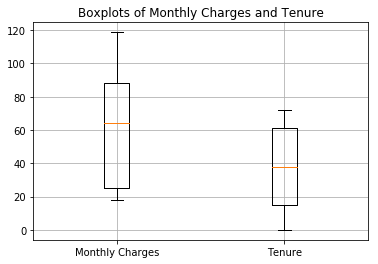

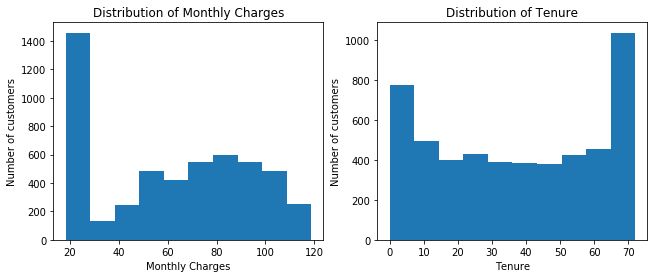

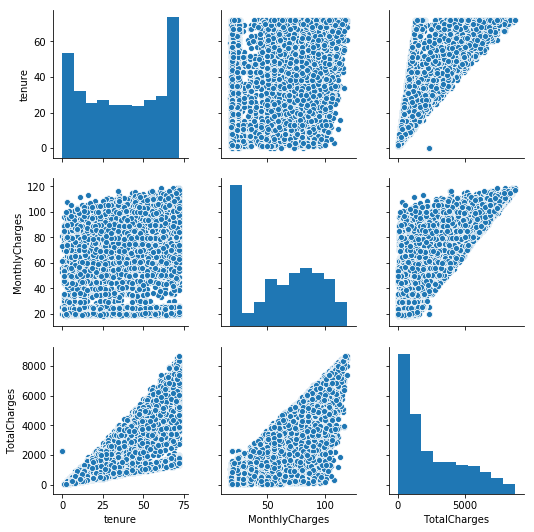

In [8]:
# Print basic statistics
print('Average monthly charges: {x:.2f}'.format(x=np.mean(data.MonthlyCharges)))
print('Min, Max: {x:}'.format(x=[np.min(data.MonthlyCharges), np.max(data.MonthlyCharges)]))
print('Median: {x:.2f}'.format(x=sts.median(data.MonthlyCharges)))
print('Mode: {x:.2f}'.format(x=sts.mode(data.MonthlyCharges)))
print('SD: {x:.2f}\n'.format(x=np.std(data.MonthlyCharges)))

print('Average total charges: {x:.2f}'.format(x=np.mean(data.TotalCharges)))
print('Min, Max: {x:}'.format(x=[np.min(data.TotalCharges), np.max(data.TotalCharges)]))
print('Median: {x:.2f}'.format(x=sts.median(data.TotalCharges)))
print('Mode: {x:.2f}'.format(x=sts.mode(data.TotalCharges)))
print('SD: {x:.2f}\n'.format(x=np.std(data.TotalCharges)))

print('Average tenure: {x:.2f}'.format(x=np.mean(data.tenure)))
print('Min, Max: {x:}'.format(x=[np.min(data.tenure), np.max(data.tenure)]))
print('Median: {x:.2f}'.format(x=sts.median(data.tenure)))
print('Mode: {x:.2f}'.format(x=sts.mode(data.tenure)))
print('SD: {x:.2f}'.format(x=np.std(data.tenure)))

plt.boxplot([data.MonthlyCharges, data.tenure])
plt.title('Boxplots of Monthly Charges and Tenure')
plt.xticks([1,2], ['Monthly Charges','Tenure'])
plt.grid()
plt.show()

# Histograms 
fig, ax = plt.subplots(1,2)
ax[0].hist(data.MonthlyCharges)
ax[0].set_title('Distribution of Monthly Charges')
ax[0].set_ylabel('Number of customers')
ax[0].set_xlabel('Monthly Charges')

ax[1].hist(data.tenure)
ax[1].set_title('Distribution of Tenure')
ax[1].set_ylabel('Number of customers')
ax[1].set_xlabel('Tenure')
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None)
plt.show()

sns.pairplot(data[['tenure','MonthlyCharges','TotalCharges']])

### Customer demographics summary

In [9]:
# Summarize demographic attributes
pd.pivot_table(data,index=['gender','SeniorCitizen','Partner','Dependents'],values='Contract',aggfunc=len,margins=True)

Contract
gender SeniorCitizen Partner Dependents          
Female 0             No      No               909
                             Yes              110
                     Yes     No               482
                             Yes              720
       1             No      No               159
                             Yes                2
                     Yes     No               136
                             Yes               31
Male   0             No      No               963
                             Yes              168
                     Yes     No               439
                             Yes              717
       1             No      No               126
                             Yes                4
                     Yes     No               176
                             Yes               32
All                                          5174

* With the pivot table, we are able to trace total number of customers in any specific demographic group

### Count Plots

Text(0.5, 1.0, 'Dependents vs. No Dependents Counts')

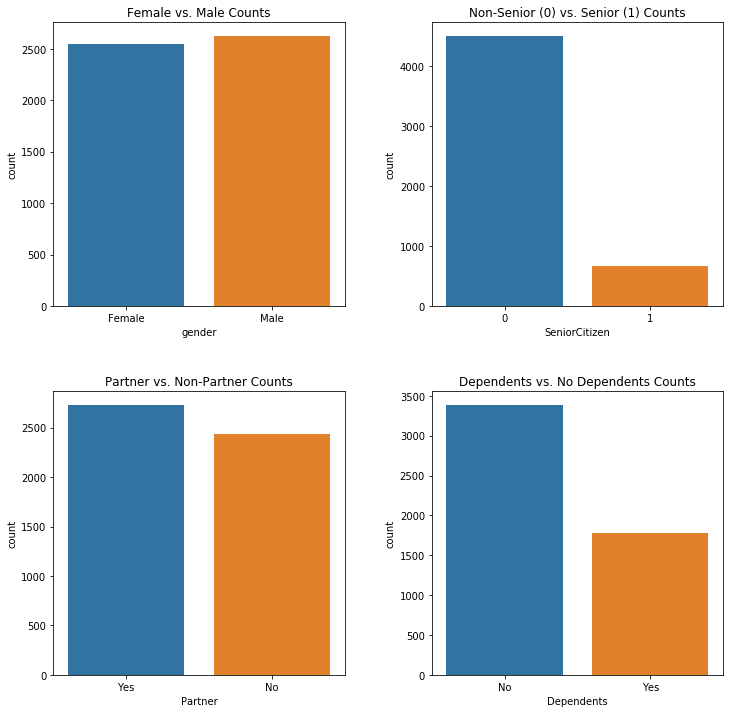

In [10]:
# Count plots of different attributes
fig, ax = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

sns.countplot(data.gender, ax=ax[0,0]).set_title('Female vs. Male Counts')
sns.countplot(data.SeniorCitizen, ax=ax[0,1]).set_title('Non-Senior (0) vs. Senior (1) Counts')
sns.countplot(data.Partner, ax=ax[1,0]).set_title('Partner vs. Non-Partner Counts')
sns.countplot(data.Dependents, ax=ax[1,1]).set_title('Dependents vs. No Dependents Counts')

* Male vs. female and Parter vs. Non-partner ratios seem roughly even.
* However, we can suspect that there is significant difference in the number of customers in: Senior vs. Non-senior and Dependents vs. No dependents groups

# Section III: T-tests on Means

In [11]:
def ttest(vector1, vector2):
    """
    Takes in two numeric vectors and compares their means via t-test.
    Parameters
    ----------
    vector1, vector2: numeric vectors (possibly with different lengths)
    Returns
    -------
    t: t-statistic
    p: two tailed p-value
    se: standard error
    """
    
    t, pval = ttest_ind(vector1, vector2)
    se = np.sqrt(np.var(vector1)/len(vector1) + np.var(vector2)/len(vector2))
    
    return t, pval, se

### All groups with binary values

In [12]:
# Lists to collect p-values, t-statistics, and standard errors
p_month = []
t_month = []
se_month = []
p_tenure = []
t_tenure = []
se_tenure = []

# Define groups to test
groups = ['gender','SeniorCitizen','Partner','Dependents','PaperlessBilling']
for i,j in enumerate(groups):
    print(pd.pivot_table(data,index=j,values=['MonthlyCharges','tenure'],aggfunc='mean'))
    print('------------------------------------------------\n')
    
    labels = list(set(data[j]))
    vector1 = data.MonthlyCharges[data[j]==labels[0]]
    vector2 = data.MonthlyCharges[data[j]==labels[1]]
        
    # T-test
    t, pval, se = ttest(vector1, vector2)
    
    # Update lists
    t_month.append(t)
    p_month.append(pval)
    se_month.append(se)
    
    # Same thing for tenure
    vector1 = data.tenure[data[j]==labels[0]]
    vector2 = data.tenure[data[j]==labels[1]]
    t, pval, se = ttest(vector1, vector2)
    t_tenure.append(t)
    p_tenure.append(pval)
    se_tenure.append(se)
    

        MonthlyCharges     tenure
gender                           
Female       61.664908  37.858768
Male         60.876914  37.289524
------------------------------------------------

               MonthlyCharges    tenure
SeniorCitizen                          
0                   58.618123  36.90661
1                   79.182057  42.06006
------------------------------------------------

         MonthlyCharges     tenure
Partner                           
No            57.271856  28.362966
Yes           64.831742  45.793267
------------------------------------------------

            MonthlyCharges     tenure
Dependents                           
No               63.465590  35.578761
Yes              57.083744  41.353700
------------------------------------------------

                  MonthlyCharges     tenure
PaperlessBilling                           
No                     49.813962  35.420308
Yes                    71.195525  39.434139
------------------------------------

### Contract Type (3 values)

In [13]:
pd.pivot_table(data,index='Contract',values=['MonthlyCharges','tenure'],aggfunc='mean')

,MonthlyCharges,tenure
Contract,,
Month-to-month,61.462635,21.033333
One year,62.508148,41.674063
Two year,60.012477,56.602914


In [14]:
F_month = []
P_an_month=[]
F_tenure=[]
P_an_tenure=[]


vector1=data.MonthlyCharges[data['Contract']=='Month-to-month']
vector2=data.MonthlyCharges[data['Contract']=='One year']
vector3=data.MonthlyCharges[data['Contract']=='Two year']
f,p=f_oneway(vector1,vector2,vector3)
F_month.append(f)
P_an_month.append(p)

vector1=data.tenure[data['Contract']=='Month-to-month']
vector2=data.tenure[data['Contract']=='One year']
vector3=data.tenure[data['Contract']=='Two year']
f,p=f_oneway(vector1,vector2,vector3)
F_tenure.append(f)
P_an_tenure.append(p)




### Payment method (4 values)

In [15]:
pd.pivot_table(data,index='PaymentMethod',values=['MonthlyCharges','tenure'],aggfunc='mean')

,MonthlyCharges,tenure
PaymentMethod,,
Bank transfer (automatic),65.049417,47.140747
Credit card (automatic),64.562209,46.101550
Electronic check,74.232032,32.136012
Mailed check,41.403911,25.083589


In [16]:
vector1=data.MonthlyCharges[data['PaymentMethod']=='Bank transfer (automatic)']
vector2=data.MonthlyCharges[data['PaymentMethod']=='Credit card (automatic)']
vector3=data.MonthlyCharges[data['PaymentMethod']=='Electronic check']
vector4=data.MonthlyCharges[data['PaymentMethod']=='Mailed check']
f_oneway(vector1,vector2,vector3)
f,p=f_oneway(vector1,vector2,vector3)
F_month.append(f)
P_an_month.append(p)

vector1=data.tenure[data['PaymentMethod']=='Bank transfer (automatic)']
vector2=data.tenure[data['PaymentMethod']=='Credit card (automatic)']
vector3=data.tenure[data['PaymentMethod']=='Electronic check']
vector4=data.tenure[data['PaymentMethod']=='Mailed check']
f,p=f_oneway(vector1,vector2,vector3)
F_tenure.append(f)
P_an_tenure.append(p)

### Visualize p-values and t-statistics

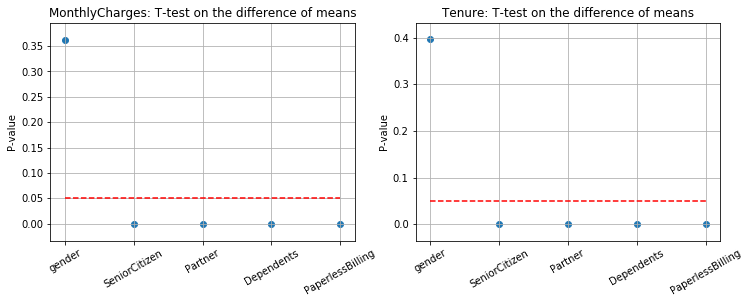

In [17]:
x = list(range(len(p_month)))
critical_value = np.ones(len(x)) * 0.05
fig, axes = plt.subplots(1,2)
fig.set_figwidth(12)

axes[0].scatter(x, p_month)
axes[0].plot(x, critical_value,'--r')
axes[0].set_xticks([0,1,2,3,4])
axes[0].set_xticklabels(groups, rotation=30)
axes[0].set_ylabel('P-value')
axes[0].set_title('MonthlyCharges: T-test on the difference of means')

axes[1].scatter(x, p_tenure)
axes[1].plot(x, critical_value,'--r')
axes[1].set_xticks([0,1,2,3,4])
axes[1].set_xticklabels(groups, rotation=30)
axes[1].set_ylabel('P-value')
axes[1].set_title('Tenure: T-test on the difference of means')

axes[0].grid()
axes[1].grid()
plt.show()

* With the exception of `gender`, all other groups report having statistically different means in `MonthlyCharges` AND `tenure` at the 5% significance level.

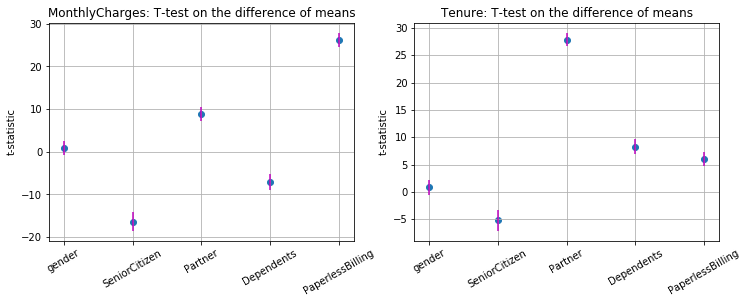

In [18]:
x = list(range(len(p_month)))
critical_value = np.ones(len(x)) * 0.05
fig, axes = plt.subplots(1,2)
fig.set_figwidth(12)

t_month = np.array(t_month)
se_month = np.array(se_month)
t_tenure = np.array(t_tenure)
se_tenure = np.array(se_tenure)

axes[0].scatter(x, t_month)
axes[0].errorbar(x, t_month, fmt='m',linestyle='None', yerr=1.96*se_month)
axes[0].set_xticks([0,1,2,3,4])
axes[0].set_xticklabels(groups, rotation=30)
axes[0].set_ylabel('t-statistic')
axes[0].set_title('MonthlyCharges: T-test on the difference of means')

axes[1].scatter(x, t_tenure)
axes[1].errorbar(x, t_tenure, fmt='m',linestyle='None', yerr=1.96*se_tenure)
axes[1].set_xticks([0,1,2,3,4])
axes[1].set_xticklabels(groups, rotation=30)
axes[1].set_ylabel('t-statistic')
axes[1].set_title('Tenure: T-test on the difference of means')

axes[0].grid()
axes[1].grid()
plt.show()

* Same interpretation as the p-value graphs: only the confidence interval of the t-statistic for `gender` includes 0, which makes it the only group where the means are not statistically different.

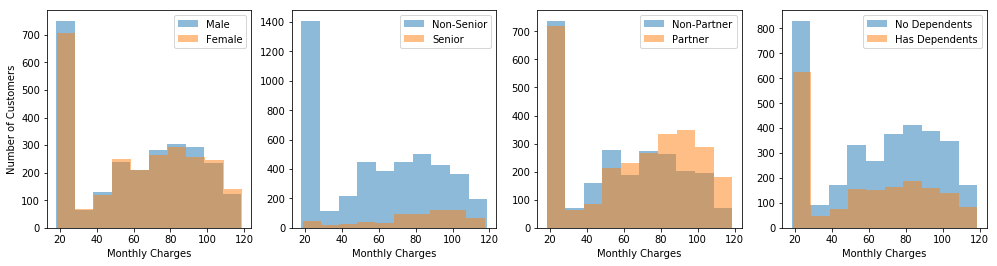

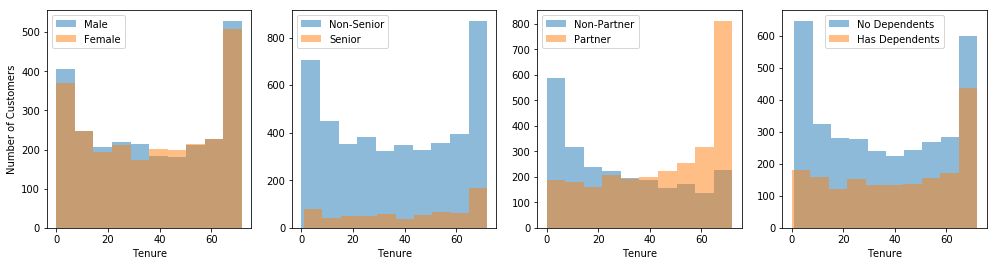

In [19]:
# Histograms of Monthly Charges
fig, axes = plt.subplots(1,4)

axes[0].hist(data.MonthlyCharges[data.gender=='Male'], alpha=0.5)
axes[0].hist(data.MonthlyCharges[data.gender=='Female'], alpha=0.5)
axes[0].legend(['Male','Female'])
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Number of Customers')

axes[1].hist(data.MonthlyCharges[data.SeniorCitizen==0], alpha=0.5)
axes[1].hist(data.MonthlyCharges[data.SeniorCitizen==1], alpha=0.5)
axes[1].legend(['Non-Senior','Senior'])
axes[1].set_xlabel('Monthly Charges')

axes[2].hist(data.MonthlyCharges[data.Partner=='No'], alpha=0.5)
axes[2].hist(data.MonthlyCharges[data.Partner=='Yes'], alpha=0.5)
axes[2].legend(['Non-Partner','Partner'])
axes[2].set_xlabel('Monthly Charges')

axes[3].hist(data.MonthlyCharges[data.Dependents=='No'], alpha=0.5)
axes[3].hist(data.MonthlyCharges[data.Dependents=='Yes'], alpha=0.5)
axes[3].legend(['No Dependents','Has Dependents'])
axes[3].set_xlabel('Monthly Charges')

plt.subplots_adjust(left=None, bottom=None, right=2.3, top=None)
plt.show()

# Histogram of tenure
fig, axes = plt.subplots(1,4)

axes[0].hist(data.tenure[data.gender=='Male'], alpha=0.5)
axes[0].hist(data.tenure[data.gender=='Female'], alpha=0.5)
axes[0].legend(['Male','Female'])
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Number of Customers')

axes[1].hist(data.tenure[data.SeniorCitizen==0], alpha=0.5)
axes[1].hist(data.tenure[data.SeniorCitizen==1], alpha=0.5)
axes[1].legend(['Non-Senior','Senior'])
axes[1].set_xlabel('Tenure')

axes[2].hist(data.tenure[data.Partner=='No'], alpha=0.5)
axes[2].hist(data.tenure[data.Partner=='Yes'], alpha=0.5)
axes[2].legend(['Non-Partner','Partner'])
axes[2].set_xlabel('Tenure')

axes[3].hist(data.tenure[data.Dependents=='No'], alpha=0.5)
axes[3].hist(data.tenure[data.Dependents=='Yes'], alpha=0.5)
axes[3].legend(['No Dependents','Has Dependents'])
axes[3].set_xlabel('Tenure')

plt.subplots_adjust(left=None, bottom=None, right=2.3, top=None)
plt.show()

### Visualize Annova F-values and p-values

In [20]:
print(F_month,F_tenure)

[2.4271961970669294, 43.888212350881] [1778.1664793933032, 180.4126941007745]


In [21]:
print(P_an_month,P_an_tenure)

[0.08838459253500108, 1.4213379517979313e-19] [0.0, 1.2321406055221342e-75]


[0, 1]


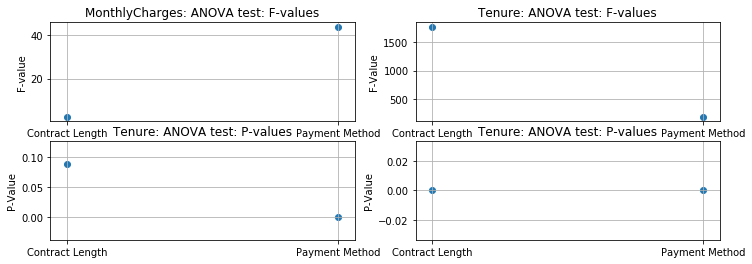

In [22]:
x = list(range(len(F_month)))
print(x)
#critical_value = np.ones(len(x)) * 0.05 #Change to give crit value for F-val
fig,axes = plt.subplots(2,2)
fig.set_figwidth(12)

F_month = np.array(F_month)
P_an_month = np.array(P_an_month)
F_tenure = np.array(F_tenure)
P_an_tenure = np.array(P_an_tenure)

axes[0,0].scatter(x,F_month)
#axes[0].errorbar(x, t_month, fmt='m',linestyle='None', yerr=1.96*se_month)
axes[0,0].set_xticks([0,1])
axes[0,0].set_xticklabels(['Contract Length','Payment Method'], rotation=0)
axes[0,0].set_ylabel('F-value')
axes[0,0].set_title('MonthlyCharges: ANOVA test: F-values')

axes[0,1].scatter(x, F_tenure)
#axes[1].errorbar(x, t_tenure, fmt='m',linestyle='None', yerr=1.96*se_tenure)
axes[0,1].set_xticks([0,1])
axes[0,1].set_xticklabels(['Contract Length','Payment Method'], rotation=0)
axes[0,1].set_ylabel('F-Value')
axes[0,1].set_title('Tenure: ANOVA test: F-values')

axes[1,0].scatter(x, P_an_month)
#axes[1].errorbar(x, t_tenure, fmt='m',linestyle='None', yerr=1.96*se_tenure)
axes[1,0].set_xticks([0,1])
axes[1,0].set_xticklabels(['Contract Length','Payment Method'], rotation=0)
axes[1,0].set_ylabel('P-Value')
axes[1,0].set_title('Tenure: ANOVA test: P-values')

axes[1,1].scatter(x, P_an_tenure)
#axes[1].errorbar(x, t_tenure, fmt='m',linestyle='None', yerr=1.96*se_tenure)
axes[1,1].set_xticks([0,1])
axes[1,1].set_xticklabels(['Contract Length','Payment Method'], rotation=0)
axes[1,1].set_ylabel('P-Value')
axes[1,1].set_title('Tenure: ANOVA test: P-values')

axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()
plt.show()

* Likely the above means that all hypotheses that the factors are insignificant are rejected. 